In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


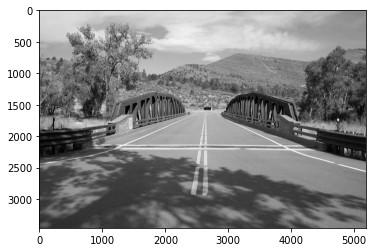

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/gdrive/My Drive/dataset"

CATEGORIES = ["normal","potholes"]

for category in CATEGORIES:  # do normal and potholes
    path = os.path.join(DATADIR,category)  # create path to normal and potholes
    for img in os.listdir(path):  # iterate over each image per normal and potholes
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [0]:
print(img_array)

[[215 215 217 ... 151 142 136]
 [218 216 217 ... 142 151 139]
 [218 217 218 ... 137 151 137]
 ...
 [ 57  57  52 ... 147 137 136]
 [ 58  59  60 ... 123 136 136]
 [ 62  57  62 ... 124 127 131]]


In [0]:
print(img_array.shape)

(3456, 5184)


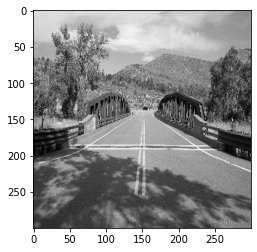

In [0]:
IMG_SIZE = 300

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

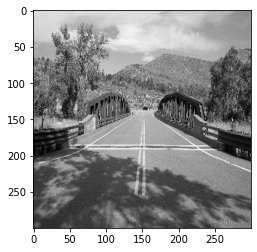

In [0]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [0]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do potholes and normal

        path = os.path.join(DATADIR,category)  # create path 
        class_num = CATEGORIES.index(category)  # (0 or a 1). 0=normal 1=pothole

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 319/319 [02:50<00:00,  1.88it/s]

669


In [0]:
import random

random.shuffle(training_data)

In [0]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
1
1
1
0
1
0


In [0]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 40]
   [ 54]
   [ 55]
   ...
   [255]
   [252]
   [252]]

  [[ 34]
   [ 50]
   [ 57]
   ...
   [255]
   [253]
   [251]]

  [[ 31]
   [ 42]
   [ 61]
   ...
   [255]
   [253]
   [253]]

  ...

  [[125]
   [144]
   [144]
   ...
   [142]
   [129]
   [122]]

  [[135]
   [135]
   [127]
   ...
   [125]
   [136]
   [121]]

  [[154]
   [139]
   [110]
   ...
   [116]
   [140]
   [134]]]]


In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = np.array(X)
y = np.array(y)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

model.save('PotholeCNN.model')

Epoch 1/10
15/15 [==============================] - 6s 388ms/step - loss: 6.4200 - accuracy: 0.5192 - val_loss: 0.6782 - val_accuracy: 0.6517
Epoch 2/10
15/15 [==============================] - 4s 287ms/step - loss: 0.6422 - accuracy: 0.7115 - val_loss: 0.6553 - val_accuracy: 0.6368
Epoch 3/10
15/15 [==============================] - 4s 286ms/step - loss: 0.5317 - accuracy: 0.7415 - val_loss: 0.6515 - val_accuracy: 0.6667
Epoch 4/10
15/15 [==============================] - 4s 288ms/step - loss: 0.4258 - accuracy: 0.7906 - val_loss: 0.5946 - val_accuracy: 0.7264
Epoch 5/10
15/15 [==============================] - 4s 286ms/step - loss: 0.3281 - accuracy: 0.8547 - val_loss: 0.6378 - val_accuracy: 0.7512
Epoch 6/10
15/15 [==============================] - 4s 288ms/step - loss: 0.2252 - accuracy: 0.9167 - val_loss: 0.6512 - val_accuracy: 0.6915
Epoch 7/10
15/15 [==============================] - 4s 286ms/step - loss: 0.1518 - accuracy: 0.9594 - val_loss: 0.7181 - val_accuracy: 0.7363
Epoch 

In [0]:
import cv2
import tensorflow as tf

CATEGORIES = ["normal", "potholes"]  # will use this to convert prediction num to string value


def prepare(filepath):
    IMG_SIZE = 300  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

In [0]:
model = tf.keras.models.load_model("PotholeCNN.model")

In [0]:
prediction = model.predict([prepare('/content/gdrive/My Drive/pothole1.jpg')])  # REMEMBER YOU'RE PASSING A LIST OF THINGS YOU WISH TO PREDICT

In [0]:
prediction

array([[0.]], dtype=float32)

In [0]:
prediction[0][0]

0.0

In [0]:
print(CATEGORIES[int(prediction[0][0])])

normal


In [0]:
prediction = model.predict([prepare('/content/gdrive/My Drive/potholes5.jpg')])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

[[1.]]
potholes


In [0]:
prediction = model.predict([prepare('/content/gdrive/My Drive/potholex.jpg')])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

[[1.]]
potholes
